In [2]:
import pypokedex
import requests
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# URL for GET requests to retrieve pokemon data
base_url = "https://pokeapi.co/api/v2/pokemon/"
print(base_url)

https://pokeapi.co/api/v2/pokemon/


In [4]:
# Create a url with a specific character id
limit = '?limit=1302'
url = base_url + limit
print(url)

https://pokeapi.co/api/v2/pokemon/?limit=1302


In [5]:
# Perform a get request for this character
response = requests.get(url)
print(response.url)

https://pokeapi.co/api/v2/pokemon/?limit=1302


In [6]:
# storing json response within a variable
pokedata = response.json()
# using json.dumps to print the json
print(json.dumps(pokedata, indent=4, sort_keys=True))

{
    "count": 1302,
    "next": null,
    "previous": null,
    "results": [
        {
            "name": "bulbasaur",
            "url": "https://pokeapi.co/api/v2/pokemon/1/"
        },
        {
            "name": "ivysaur",
            "url": "https://pokeapi.co/api/v2/pokemon/2/"
        },
        {
            "name": "venusaur",
            "url": "https://pokeapi.co/api/v2/pokemon/3/"
        },
        {
            "name": "charmander",
            "url": "https://pokeapi.co/api/v2/pokemon/4/"
        },
        {
            "name": "charmeleon",
            "url": "https://pokeapi.co/api/v2/pokemon/5/"
        },
        {
            "name": "charizard",
            "url": "https://pokeapi.co/api/v2/pokemon/6/"
        },
        {
            "name": "squirtle",
            "url": "https://pokeapi.co/api/v2/pokemon/7/"
        },
        {
            "name": "wartortle",
            "url": "https://pokeapi.co/api/v2/pokemon/8/"
        },
        {
            "name"

In [7]:
# Getting length of results of json
pokedata_length = len(pokedata["results"])
print(pokedata_length)

1302


In [8]:
# Checking results content
pokedata_results = pokedata["results"]
pokedata_results

[{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
 {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
 {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
 {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
 {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
 {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
 {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
 {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
 {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
 {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
 {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
 {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
 {'name': 'weedle', 'url': 'https://pokeapi.co/api/v2/pokemon/13/'},
 {'name': 'kakuna', 'url': 'https://pokeapi.co/api/v2/pokemon/14/'},
 {'name': '

In [9]:
# Creating empty lists to store names and ids
poke_names = []
poke_ids = []

# Creating for loop to get pokemon name and then ID from the urls
for data in pokedata_results:
    poke_name = data['name']
    poke_id = re.search(r'/(\d+)/$', data['url']).group(1)
    
    poke_names.append(poke_name)
    poke_ids.append(poke_id)

# Creating a dictionary from the lists
data_dict = {
    'Pokemon ID': poke_ids,
    'Pokemon Name': poke_names
}

# Creating a Pandas DataFrame from the dictionary
pokemon_df = pd.DataFrame(data_dict)

# Printing the DataFrame
pokemon_df

,Pokemon ID,Pokemon Name
0,1,bulbasaur
1,2,ivysaur
2,3,venusaur
3,4,charmander
4,5,charmeleon
...,...,...
1297,10273,ogerpon-wellspring-mask
1298,10274,ogerpon-hearthflame-mask
1299,10275,ogerpon-cornerstone-mask
1300,10276,terapagos-terastal


In [10]:
# Creating more lists for more data
types = []
base_stat = []

# Changing to int
pokemon_df['Pokemon ID'] = pokemon_df['Pokemon ID'].astype(int)

In [11]:
# Checking dataframe
pokemon_more_info_df = pokemon_df.copy()
pokemon_more_info_df

,Pokemon ID,Pokemon Name
0,1,bulbasaur
1,2,ivysaur
2,3,venusaur
3,4,charmander
4,5,charmeleon
...,...,...
1297,10273,ogerpon-wellspring-mask
1298,10274,ogerpon-hearthflame-mask
1299,10275,ogerpon-cornerstone-mask
1300,10276,terapagos-terastal


In [12]:
# Creating for loop to append types and data to dataframe
for id in pokemon_df['Pokemon ID']:
    p = pypokedex.get(dex=id) 
    name = p.name
    type_data = p.types
    stat_data = p.base_stats
  
    types.append(type_data)
    base_stat.append(stat_data)

In [13]:
# Creating new columns and filling with data from pypokedex
pokemon_more_info_df['Pokemon Types'] = types
pokemon_more_info_df['Pokemon Base Stats'] = base_stat

In [14]:
# Converting the separate lists into strings to later split into separate columns
pokemon_more_info_df['Pokemon Types'] = pokemon_more_info_df['Pokemon Types'].map(lambda x : ",".join(x))
pokemon_more_info_df['Pokemon Types'].str.split(", ", expand = True)
pokemon_more_info_df

,Pokemon ID,Pokemon Name,Pokemon Types,Pokemon Base Stats
0,1,bulbasaur,"grass,poison","(45, 49, 49, 65, 65, 45)"
1,2,ivysaur,"grass,poison","(60, 62, 63, 80, 80, 60)"
2,3,venusaur,"grass,poison","(80, 82, 83, 100, 100, 80)"
3,4,charmander,fire,"(39, 52, 43, 60, 50, 65)"
4,5,charmeleon,fire,"(58, 64, 58, 80, 65, 80)"
...,...,...,...,...
1297,10273,ogerpon-wellspring-mask,"grass,water","(80, 120, 84, 60, 96, 110)"
1298,10274,ogerpon-hearthflame-mask,"grass,fire","(80, 120, 84, 60, 96, 110)"
1299,10275,ogerpon-cornerstone-mask,"grass,rock","(80, 120, 84, 60, 96, 110)"
1300,10276,terapagos-terastal,normal,"(95, 95, 110, 105, 110, 85)"


In [15]:
# Creating copy of df
pokemon_clean_df = pokemon_more_info_df.copy()

In [16]:
# Ensuring column is a string to split it later
pokemon_clean_df['Pokemon Base Stats'] = pokemon_clean_df['Pokemon Base Stats'].astype(str)

pokemon_clean_df.dtypes

Pokemon ID             int32
Pokemon Name          object
Pokemon Types         object
Pokemon Base Stats    object
dtype: object

In [17]:
# Cleaning the 'Pokemon Base Stats' column
pokemon_clean_df['Pokemon Base Stats'] = pokemon_clean_df['Pokemon Base Stats'].str.replace(r'[\(\)]', '', regex=True)

# Splitting base stats into separate columns
base_stats_df = pokemon_clean_df['Pokemon Base Stats'].str.split(', ', expand=True)
base_stats_df.columns = ['Base HP', 'Base Attack', 'Base Defense', 'Base Special Attack', 'Base Special Defense', 'Base Speed']

# Splitting types into separate columns
pokemon_clean_df['Type1'] = pokemon_clean_df['Pokemon Types'].str.split(',').str[0]
pokemon_clean_df['Type2'] = pokemon_clean_df['Pokemon Types'].str.split(',').str[1].fillna('')

# Combining the DataFrame with base stats
pokemon_new_df = pd.concat([pokemon_clean_df, base_stats_df], axis=1)

# Dropping the original combined columns
pokemon_new_df = pokemon_new_df.drop(columns=['Pokemon Base Stats', 'Pokemon Types'])

# Displaying DataFrame
pokemon_new_df.head()

,Pokemon ID,Pokemon Name,Type1,Type2,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed
0,1,bulbasaur,grass,poison,BaseStatshp=45,attack=49,defense=49,sp_atk=65,sp_def=65,speed=45
1,2,ivysaur,grass,poison,BaseStatshp=60,attack=62,defense=63,sp_atk=80,sp_def=80,speed=60
2,3,venusaur,grass,poison,BaseStatshp=80,attack=82,defense=83,sp_atk=100,sp_def=100,speed=80
3,4,charmander,fire,,BaseStatshp=39,attack=52,defense=43,sp_atk=60,sp_def=50,speed=65
4,5,charmeleon,fire,,BaseStatshp=58,attack=64,defense=58,sp_atk=80,sp_def=65,speed=80


In [18]:
# Creating function to extract number from each base stat cell to only input number into columns
def extract_number(stat_str):
    return int(re.search(r'\d+', stat_str).group())

# Applying the function to each base stat column
base_stat_columns = ['Base HP', 'Base Attack', 'Base Defense', 'Base Special Attack', 'Base Special Defense', 'Base Speed']
for col in base_stat_columns:
    pokemon_new_df[col] = pokemon_new_df[col].apply(extract_number)

In [19]:
# Display the cleaned DataFrame
pokemon_new_df.head()

,Pokemon ID,Pokemon Name,Type1,Type2,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed
0,1,bulbasaur,grass,poison,45,49,49,65,65,45
1,2,ivysaur,grass,poison,60,62,63,80,80,60
2,3,venusaur,grass,poison,80,82,83,100,100,80
3,4,charmander,fire,,39,52,43,60,50,65
4,5,charmeleon,fire,,58,64,58,80,65,80


In [20]:
# URL for GET requests to retrieve pokemon evolution data
chain_url = "https://pokeapi.co/api/v2/evolution-chain/"
print(chain_url)

https://pokeapi.co/api/v2/evolution-chain/


In [21]:
ev_str = "?limit=541"
url = chain_url + ev_str

In [22]:
# Performing get request
ev_response = requests.get(url)
print(ev_response.url)

https://pokeapi.co/api/v2/evolution-chain/?limit=541


In [23]:
# storing json response within a variable
ev_chain = ev_response.json()
# using json.dumps to print the json
print(json.dumps(ev_chain, indent=4, sort_keys=True))

{
    "count": 541,
    "next": null,
    "previous": null,
    "results": [
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/1/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/2/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/3/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/4/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/5/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/6/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/7/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/8/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/9/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/10/"
        },
        {
            "url": "https://pokeapi.co/api

In [24]:
# Checking results and grabbing only the urls
ev_results = [chain['url'] for chain in ev_chain['results']]
ev_results

['https://pokeapi.co/api/v2/evolution-chain/1/',
 'https://pokeapi.co/api/v2/evolution-chain/2/',
 'https://pokeapi.co/api/v2/evolution-chain/3/',
 'https://pokeapi.co/api/v2/evolution-chain/4/',
 'https://pokeapi.co/api/v2/evolution-chain/5/',
 'https://pokeapi.co/api/v2/evolution-chain/6/',
 'https://pokeapi.co/api/v2/evolution-chain/7/',
 'https://pokeapi.co/api/v2/evolution-chain/8/',
 'https://pokeapi.co/api/v2/evolution-chain/9/',
 'https://pokeapi.co/api/v2/evolution-chain/10/',
 'https://pokeapi.co/api/v2/evolution-chain/11/',
 'https://pokeapi.co/api/v2/evolution-chain/12/',
 'https://pokeapi.co/api/v2/evolution-chain/13/',
 'https://pokeapi.co/api/v2/evolution-chain/14/',
 'https://pokeapi.co/api/v2/evolution-chain/15/',
 'https://pokeapi.co/api/v2/evolution-chain/16/',
 'https://pokeapi.co/api/v2/evolution-chain/17/',
 'https://pokeapi.co/api/v2/evolution-chain/18/',
 'https://pokeapi.co/api/v2/evolution-chain/19/',
 'https://pokeapi.co/api/v2/evolution-chain/20/',
 'https:/

In [25]:
# Creating copy of pokemon_new_df for later evolutions dataframe
pokemon_ev_df = pokemon_new_df.copy()
pokemon_ev_df.head()

,Pokemon ID,Pokemon Name,Type1,Type2,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed
0,1,bulbasaur,grass,poison,45,49,49,65,65,45
1,2,ivysaur,grass,poison,60,62,63,80,80,60
2,3,venusaur,grass,poison,80,82,83,100,100,80
3,4,charmander,fire,,39,52,43,60,50,65
4,5,charmeleon,fire,,58,64,58,80,65,80


In [26]:
grouped_pokenames = []
# Fetching detailed data from each URL and extract Pokémon names
def thru_chain(chain, current_group):
    # Extract the Pokémon name
    current_group.append(chain['species']['name'])
    
    # Go through each evolution chain
    for evo in chain['evolves_to']:
        thru_chain(evo, current_group)

for url in ev_results:
    evo_response = requests.get(url)
    evo_chain = evo_response.json()['chain']
    
    # Start from root of the chain to end
    chain_group = []
    thru_chain(evo_chain, chain_group)
    
    # Append current evolution chain's grouped names to main list
    grouped_pokenames.append(chain_group)


In [27]:
# Mapping from Pokémon names to evolution chain numbers
evolution_chain_map = {}
for chain_no, chain in enumerate(grouped_pokenames, start=1):
    for stage_no, pokemon in enumerate(chain, start=1):
        evolution_chain_map[pokemon] = chain_no

# Function to get the evolution chain number for a Pokemon
def get_evolution_chain_no(pokemon_name):
    return evolution_chain_map.get(pokemon_name, None)

# Making Evolution Chain column
pokemon_ev_df['Evolution Chain'] = pokemon_ev_df['Pokemon Name'].apply(get_evolution_chain_no)

# Filling NA values in case any Pokemon does not have an evolution chain number
pokemon_ev_df['Evolution Chain'].fillna(value='None', inplace=True)

# Display the updated DataFrame
pokemon_ev_df.head(25)

C:\Users\ashca\AppData\Local\Temp\ipykernel_19924\3959960206.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pokemon_ev_df['Evolution Chain'].fillna(value='None', inplace=True)


,Pokemon ID,Pokemon Name,Type1,Type2,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed,Evolution Chain
0,1,bulbasaur,grass,poison,45,49,49,65,65,45,1.0
1,2,ivysaur,grass,poison,60,62,63,80,80,60,1.0
2,3,venusaur,grass,poison,80,82,83,100,100,80,1.0
3,4,charmander,fire,,39,52,43,60,50,65,2.0
4,5,charmeleon,fire,,58,64,58,80,65,80,2.0
5,6,charizard,fire,flying,78,84,78,109,85,100,2.0
6,7,squirtle,water,,44,48,65,50,64,43,3.0
7,8,wartortle,water,,59,63,80,65,80,58,3.0
8,9,blastoise,water,,79,83,100,85,105,78,3.0
9,10,caterpie,bug,,45,30,35,20,20,45,4.0


In [28]:
pokemon_ev_df.dtypes

Pokemon ID               int32
Pokemon Name            object
Type1                   object
Type2                   object
Base HP                  int64
Base Attack              int64
Base Defense             int64
Base Special Attack      int64
Base Special Defense     int64
Base Speed               int64
Evolution Chain         object
dtype: object

In [29]:
# Replacing 'None' with nas
pokemon_ev_df['Evolution Chain'] = pokemon_ev_df['Evolution Chain'].replace('None', np.nan)

# Converting 'Evolution Chain' to integers and filling nas
pokemon_ev_df['Evolution Chain'] = pokemon_ev_df['Evolution Chain'].fillna(0).astype(int)

# Cheching Dataframe
pokemon_ev_df.head()

,Pokemon ID,Pokemon Name,Type1,Type2,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed,Evolution Chain
0,1,bulbasaur,grass,poison,45,49,49,65,65,45,1
1,2,ivysaur,grass,poison,60,62,63,80,80,60,1
2,3,venusaur,grass,poison,80,82,83,100,100,80,1
3,4,charmander,fire,,39,52,43,60,50,65,2
4,5,charmeleon,fire,,58,64,58,80,65,80,2


In [30]:
# Checking 
grouped_pokenames

[['bulbasaur', 'ivysaur', 'venusaur'],
 ['charmander', 'charmeleon', 'charizard'],
 ['squirtle', 'wartortle', 'blastoise'],
 ['caterpie', 'metapod', 'butterfree'],
 ['weedle', 'kakuna', 'beedrill'],
 ['pidgey', 'pidgeotto', 'pidgeot'],
 ['rattata', 'raticate'],
 ['spearow', 'fearow'],
 ['ekans', 'arbok'],
 ['pichu', 'pikachu', 'raichu'],
 ['sandshrew', 'sandslash'],
 ['nidoran-f', 'nidorina', 'nidoqueen'],
 ['nidoran-m', 'nidorino', 'nidoking'],
 ['cleffa', 'clefairy', 'clefable'],
 ['vulpix', 'ninetales'],
 ['igglybuff', 'jigglypuff', 'wigglytuff'],
 ['zubat', 'golbat', 'crobat'],
 ['oddish', 'gloom', 'vileplume', 'bellossom'],
 ['paras', 'parasect'],
 ['venonat', 'venomoth'],
 ['diglett', 'dugtrio'],
 ['meowth', 'persian', 'perrserker'],
 ['psyduck', 'golduck'],
 ['mankey', 'primeape', 'annihilape'],
 ['growlithe', 'arcanine'],
 ['poliwag', 'poliwhirl', 'poliwrath', 'politoed'],
 ['abra', 'kadabra', 'alakazam'],
 ['machop', 'machoke', 'machamp'],
 ['bellsprout', 'weepinbell', 'victre

In [31]:
# Creating more lists for new evolutions dataframe
evolution_chain = []
stage_1 = []
stage_2 = []
stage_3 = []

# Creating for loop to collect data from grouped_pokenames for evolutions dataframe
for index, group in enumerate(grouped_pokenames, start=1):
    evolution_chain.append(f"{index}")
    
    # Adding the stages and inputting None if there is no pokemon there
    stage_1.append(group[0] if len(group) > 0 else None)
    stage_2.append(group[1] if len(group) > 1 else None)
    stage_3.append(group[2] if len(group) > 2 else None)

# Ensuring all arrays are equal length
max_length = max(len(evolution_chain), len(stage_1), len(stage_2), len(stage_3))

# Appending nones
while len(stage_1) < max_length:
    stage_1.append(None)
while len(stage_2) < max_length:
    stage_2.append(None)
while len(stage_3) < max_length:
    stage_3.append(None)
while len(evolution_chain) < max_length:
    evolution_chain.append(None)

# Creating evolutions df dictionary
data_dict = {
    'Evolution Chain': evolution_chain,
    'Stage 1': stage_1,
    'Stage 2': stage_2,
    'Stage 3': stage_3
}

# Creating DataFrame
evolutions_df = pd.DataFrame(data_dict)

# Printing Dataframe
print(evolutions_df)

    Evolution Chain       Stage 1     Stage 2     Stage 3
0                 1     bulbasaur     ivysaur    venusaur
1                 2    charmander  charmeleon   charizard
2                 3      squirtle   wartortle   blastoise
3                 4      caterpie     metapod  butterfree
4                 5        weedle      kakuna    beedrill
..              ...           ...         ...         ...
536             537   raging-bolt        None        None
537             538    iron-crown        None        None
538             539  iron-boulder        None        None
539             540     terapagos        None        None
540             541     pecharunt        None        None

[541 rows x 4 columns]


In [32]:
evolutions_df['Evolution Chain'] = evolutions_df['Evolution Chain'].astype(int)

In [33]:
evolutions_df.head(25)

,Evolution Chain,Stage 1,Stage 2,Stage 3
0,1,bulbasaur,ivysaur,venusaur
1,2,charmander,charmeleon,charizard
2,3,squirtle,wartortle,blastoise
3,4,caterpie,metapod,butterfree
4,5,weedle,kakuna,beedrill
5,6,pidgey,pidgeotto,pidgeot
6,7,rattata,raticate,None
7,8,spearow,fearow,None
8,9,ekans,arbok,None
9,10,pichu,pikachu,raichu


In [34]:
pokemon_ev_df.head(25)

,Pokemon ID,Pokemon Name,Type1,Type2,Base HP,Base Attack,Base Defense,Base Special Attack,Base Special Defense,Base Speed,Evolution Chain
0,1,bulbasaur,grass,poison,45,49,49,65,65,45,1
1,2,ivysaur,grass,poison,60,62,63,80,80,60,1
2,3,venusaur,grass,poison,80,82,83,100,100,80,1
3,4,charmander,fire,,39,52,43,60,50,65,2
4,5,charmeleon,fire,,58,64,58,80,65,80,2
5,6,charizard,fire,flying,78,84,78,109,85,100,2
6,7,squirtle,water,,44,48,65,50,64,43,3
7,8,wartortle,water,,59,63,80,65,80,58,3
8,9,blastoise,water,,79,83,100,85,105,78,3
9,10,caterpie,bug,,45,30,35,20,20,45,4


In [35]:
pokemon_ev_df.dtypes

Pokemon ID               int32
Pokemon Name            object
Type1                   object
Type2                   object
Base HP                  int64
Base Attack              int64
Base Defense             int64
Base Special Attack      int64
Base Special Defense     int64
Base Speed               int64
Evolution Chain          int32
dtype: object

In [36]:
evolutions_df.dtypes

Evolution Chain     int32
Stage 1            object
Stage 2            object
Stage 3            object
dtype: object

In [37]:
# Saving the two dataframes to csvs
pokemon_ev_df.to_csv('Pokemon Base Info', index = False)
evolutions_df.to_csv('Pokemon Evolution Chains', index = False)

In [ ]:
# Setting poke id to index
pokemon_ev_df.set_index('Pokemon ID', inplace=True)


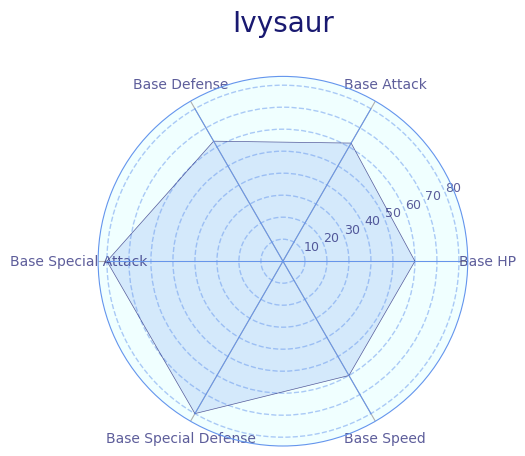

In [106]:
# Making radar chart for base stats
# Creating radar chart function 
def radar_chart(stats_df, poke_id):
    # Listing base stat categories
    categories = ['Base HP', 'Base Attack', 'Base Defense', 'Base Special Attack', 'Base Special Defense', 'Base Speed']
    N = len(categories)

    # Putting the base stat categories into their own lists then starting back at the first one (to close the chart)
    values = stats_df.loc[poke_id, categories].values.flatten().tolist()
    values += values[:1]

    # Calculating each angle around the circle
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Plotting and formatting
    ax = plt.subplot(111, polar=True)

    # Setting bg color to azure
    ax.set_facecolor('azure')
    ax.plot(angles, values, linewidth = 0.5, linestyle = 'solid', color = 'midnightblue', alpha = 0.7)
    ax.fill(angles, values, 'cornflowerblue', alpha=0.2)
    ax.spines['polar'].set_color('cornflowerblue')

    # Formatting for grid lines
    ax.yaxis.grid(True, color='cornflowerblue', linestyle='--', linewidth=1, alpha=0.5)
    for angle in angles[:-1]:
        ax.plot([angle, angle], [0, max(values)], color='cornflowerblue', linewidth = 0.7)

    # Formatting for xticks and yticks
    plt.xticks(angles[:-1], categories, color='midnightblue', size=10, alpha = 0.7)
    plt.yticks(color = 'midnightblue',size = 9, alpha = 0.7)

    # Ensuring radar chart name is capitalized
    chart_name = stats_df.loc[poke_id, 'Pokemon Name'].capitalize()
    plt.title(chart_name, size=20, color='midnightblue', y=1.1)
    plt.show()

# Creating radar chart for second pokemon
radar_chart(pokemon_ev_df, 2)


In [103]:
# Checking pypokedex base stats to see if radar chart is correct
p = pypokedex.get(dex = 1)
p.base_stats

BaseStats(hp=45, attack=49, defense=49, sp_atk=65, sp_def=65, speed=45)

In [ ]:
# user input radar chart
def user_radar_chart(stats_df):
    input = input("")

In [107]:
pokemon_df.to_csv('pokemon.txt', index = False, sep= ',')